# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

C:\Users\DEX\AppData\Local\Temp\ipykernel_26428\3107362156.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


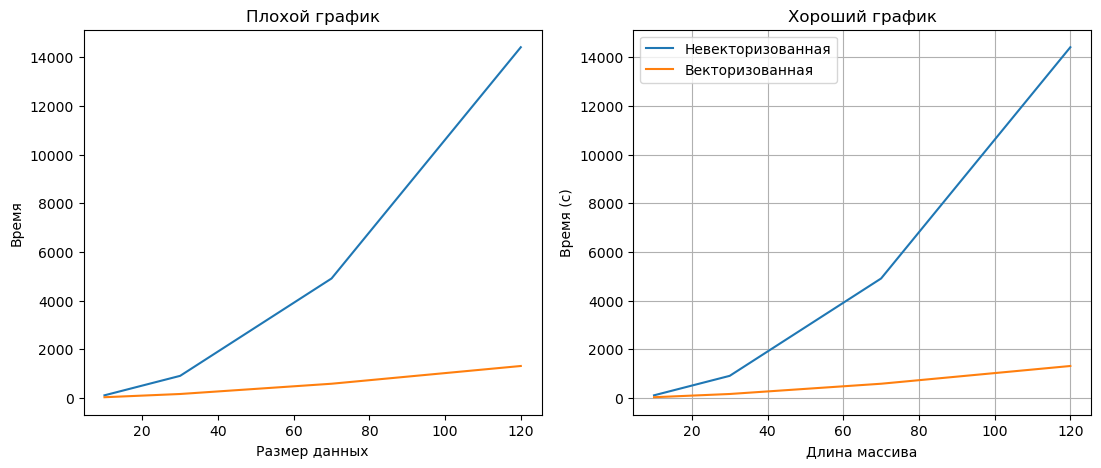

In [191]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

In [256]:
def prod_non_zero_diag(a):
    ans = 1

    n = len(a) - 1
    m = len(a[0]) - 1

    x = 0
    y = 0

    while (x <= n and y <= m):
        if (a[x][y] != 0):
            ans *= a[x][y]
        x += 1
        y += 1


    return ans

In [257]:
def prod_non_zero_diag_vect(a):
    return np.prod(np.diag(a)[np.diag(a)!=0])

 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


In [258]:
def are_multisets_equal(a, b):
    if(len(a) != len(b)):
        return False
    a.sort()
    b.sort()
    for i in range(len(a)):
        if(a[i] != b[i]):
            return False
    return True

In [259]:
def are_multisets_equal_vect(a, b):
    if (len(a) != len(b)):
        return False
    a=np.array([1,2,3,3,3])
    b=np.array([2,1,3,3,3])
    val=set(a)==set(b)
    return 0

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

In [260]:
def max_after_zero(a):
    mx = -1
    for i in range(1, len(a)):
        if (a[i - 1] == 0 and a[i] > mx):
            mx = a[i]

    return mx

In [261]:
def max_after_zero_vect(a):
    return (a[1:][(a==0)[:-1]])

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


In [262]:
def convert_image(img, coefs):
    n = len(img)
    m = len(img[0])
    res = list()
    for i in range(n):
        h = list()
        for j in range(m):
            h.append(0)
            for k in range(len(coefs)):
                h[-1] += img[i][j][k] * coefs[k]
        res.append(h)
            
    return img

In [263]:
def convert_image_vect(img, coefs):
    return np.sum(img * coeff, axis=-1)

C:\Users\DEX\AppData\Local\Temp\ipykernel_26428\1010530589.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


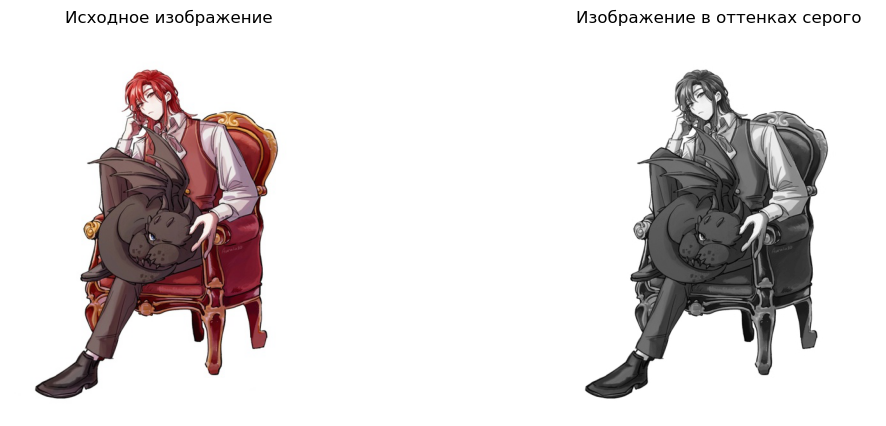

In [264]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow
import numpy as np

%matplotlib inline

img = imread('C:/Users/DEX/Desktop/task/Cale.jpg')
coeff = np.array([0.299, 0.587, 0.114])
img_grey = convert_image_vect(img, coeff)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
ax1.imshow(img)
ax1.set_title('Исходное изображение')
ax1.axis('off')
ax2.imshow(img_grey, cmap='gray')
ax2.set_title('Изображение в оттенках серого')
ax2.axis('off')

fig.show()

In [265]:
'''Этот код (вывод изображения) я тоже списала (ссылку см. ниже), но я разобралась в нем.
Функция imread() считывает изображение из данного пути. Затем изображение конвертируется с помощью функции 
convert_image_vect(). Затем задаются параметры его вывода и оно выводится на оси в двух вариантах - цветном и черно-белом.
 '''

'Этот код (вывод изображения) я тоже списала (ссылку см. ниже), но я разобралась в нем.\nФункция imread() считывает изображение из данного пути. Затем изображение конвертируется с помощью функции \nconvert_image_vect(). Затем задаются параметры его вывода и оно выводится на оси в двух вариантах - цветном и черно-белом.\n '

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

In [266]:
def run_length_encoding(a):
    d = dict()

    for i in a:
        if (i not in d.keys()):
            d[i] = 1
        else:
            d[i] += 1

    res = ([], [])

    for i in list(d.keys()):
        res[0].append(i)
        res[1].append(d[i])

    return res

In [267]:
def run_length_encoding_vect(a):
    y = np.hstack((np.ones(1),a[:- 1]))
    first_positions = a != y
    first_positions[0] = True
    indexes_1 = np.arange(np.size(a))[first_positions]
    indexes_2 = np.hstack((indexes_1[1:], np.array([np.size(a)])))
    return a[first_positions], indexes_2 - indexes_1

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

In [268]:
def pairwise_distance(a, b):
    n = len(a)
    m = len(a[0])
    c = []
    for i in range(n):
        c.append([0] * m)

    for i in range(0, n):
        for j in range(0, m):
            c[i][j] = ((a[i][0] - b[j][0])**2 + (a[i][1] - b[j][1])**2)**0.5

    return c

In [269]:
def pairwise_distance_vect(a, b):
    return np.sqrt(np.sum((a[:, np.newaxis] - b) ** 2, axis=-1))

In [270]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [271]:
data_size_1 = [x for x in range(10, 150, 20)]
vect_list_1 = list()
non_vect_list_1 = list()

for size in data_size_1:
    X = np.random.randint(-2, 2, (size, size))
    vect_time = %timeit -o prod_non_zero_diag_vect(X)
    non_vect_time = %timeit -o prod_non_zero_diag(X)
    vect_list_1.append(vect_time.average * 1000000)
    non_vect_list_1.append(non_vect_time.average * 1000000)

8.94 µs ± 31.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
4.26 µs ± 268 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
7.52 µs ± 23.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
11.3 µs ± 66.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
7.71 µs ± 80.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
17.6 µs ± 114 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
7.89 µs ± 103 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
25.8 µs ± 252 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
7.7 µs ± 53.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
33.3 µs ± 434 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
7.84 µs ± 181 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
41.7 µs ± 490 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
8.19 µs ± 48.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


C:\Users\DEX\AppData\Local\Temp\ipykernel_26428\1429409193.py:12: RuntimeWarning: overflow encountered in scalar multiply
  ans *= a[x][y]


50.8 µs ± 952 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


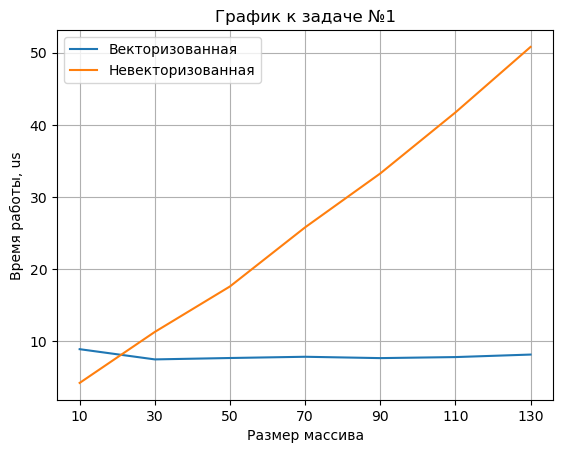

In [272]:
plt.plot(data_size_1, vect_list_1, label=u"Векторизованная")
plt.plot(data_size_1, non_vect_list_1, label=u"Невекторизованная")
plt.xticks(data_size_1)
plt.xlabel(u'Размер маcсива')
plt.ylabel(u'Время работы, us')
plt.title(u'График к задаче №1')
plt.grid(True)
plt.legend()

plt.show()

In [273]:
data_size_2 = [x for x in range(1000, 10000, 1000)]    
vect_list_2 = list()
non_vect_list_2 = list()

for size in data_size_2:
    x = np.random.randint(-10, 10, (size))
    y = np.random.randint(-10, 10, (size))
    vect_time = %timeit -o are_multisets_equal_vect(x, y)
    non_vect_time = %timeit -o are_multisets_equal(x, y)
    vect_list_2.append(vect_time.average * 1000000)
    non_vect_list_2.append(non_vect_time.average * 1000000)

2.96 µs ± 5.08 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
14.7 µs ± 68.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
2.97 µs ± 19.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
30 µs ± 177 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.97 µs ± 20.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
48.2 µs ± 1.44 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
3.04 µs ± 58.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
67.5 µs ± 2.26 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.95 µs ± 13.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
79.7 µs ± 436 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.95 µs ± 16.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
99.2 µs ± 664 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.96 µs ± 14.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
115 µs ± 863 ns per lo

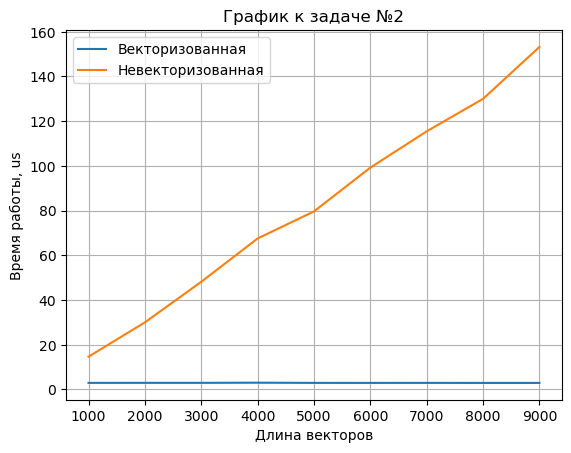

In [274]:
plt.plot(data_size_2, vect_list_2, label=u"Векторизованная")
plt.plot(data_size_2, non_vect_list_2, label=u"Невекторизованная")
plt.xticks(data_size_2)
plt.xlabel(u'Длина векторов')
plt.ylabel(u'Время работы, us')
plt.title(u'График к задаче №2')
plt.grid(True)
plt.legend()

plt.show()

In [275]:
data_size_3 = [x for x in range(1000, 10000, 1000)]    
vect_list_3 = list()
non_vect_list_3 = list()

for size in data_size_3:
    x = np.random.randint(-10, 10, (size))
    vect_time = %timeit -o max_after_zero_vect(x)
    non_vect_time = %timeit -o max_after_zero(x)
    vect_list_3.append(vect_time.average * 1000000)
    non_vect_list_3.append(non_vect_time.average * 1000000)

2.23 µs ± 24.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
129 µs ± 1.15 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.73 µs ± 40.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
270 µs ± 5.46 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
3.44 µs ± 49.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
402 µs ± 4.09 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
3.65 µs ± 29 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
527 µs ± 5.73 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4 µs ± 11.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
673 µs ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4.54 µs ± 39.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
795 µs ± 18.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
5.26 µs ± 78.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
913 µs ± 8.16 µs per loop (mean ± 

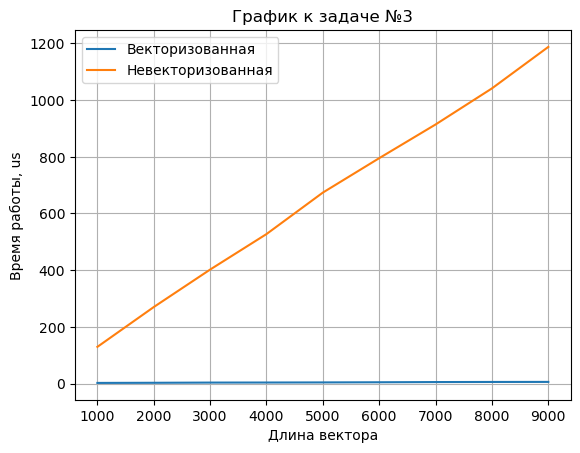

In [276]:
plt.plot(data_size_3, vect_list_3, label=u"Векторизованная")
plt.plot(data_size_3, non_vect_list_3, label=u"Невекторизованная")
plt.xticks(data_size_3)
plt.xlabel(u'Длина вектора')
plt.ylabel(u'Время работы, us')
plt.title(u'График к задаче №3')
plt.grid(True)
plt.legend()

plt.show()



In [277]:
data_size_4 = [x for x in range(10, 150, 20)]    
vect_list_4 = list()
non_vect_list_4 = list()

for size in data_size_4:
    img = np.random.randint(-2, 2, (size, size, 3))
    coeff = np.random.random(3)
    vect_time = %timeit -o convert_image_vect(img, coeff)
    non_vect_time = %timeit -o convert_image(img, coeff)
    vect_list_4.append(vect_time.average * 1000)
    non_vect_list_4.append(non_vect_time.average * 1000)

6.71 µs ± 12.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
183 µs ± 1.86 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
22.6 µs ± 276 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.63 ms ± 7.66 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
50.9 µs ± 323 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
4.57 ms ± 33.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
94.2 µs ± 986 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
8.91 ms ± 42.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
151 µs ± 2.3 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
14.8 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
219 µs ± 945 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
22.2 ms ± 91.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
324 µs ± 999 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
30.9 ms ± 150 µs per loop (mean ± std. dev. of 7 ru

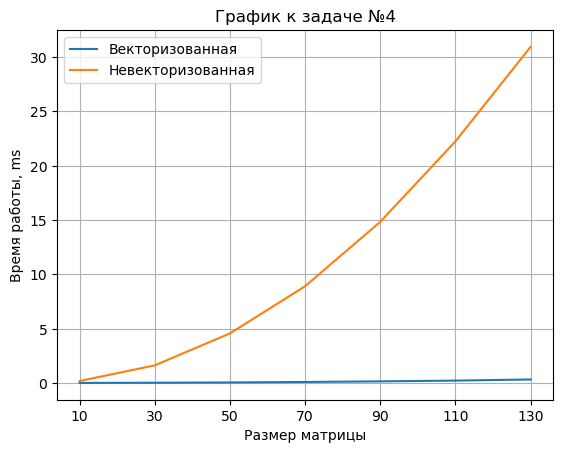

In [278]:
plt.plot(data_size_4, vect_list_4, label=u"Векторизованная")
plt.plot(data_size_4, non_vect_list_4, label=u"Невекторизованная")
plt.xticks(data_size_4)
plt.xlabel(u'Размер матрицы')
plt.ylabel(u'Время работы, ms')
plt.title(u'График к задаче №4')
plt.grid(True)
plt.legend()

plt.show()

In [279]:
data_size_5 = [x for x in range(10, 1000, 100)]    
vect_list_5 = list()
non_vect_list_5 = list()

for size in data_size_5:
    x = np.random.randint(-5, 5, (size))
    vect_time = %timeit -o run_length_encoding_vect(x)
    non_vect_time = %timeit -o run_length_encoding(x)
    vect_list_5.append(vect_time.average * 1000000)
    non_vect_list_5.append(non_vect_time.average * 1000000)

14.4 µs ± 90.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
3.8 µs ± 45.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
15.1 µs ± 207 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
21.4 µs ± 295 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
15.6 µs ± 122 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
40.3 µs ± 668 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
16.6 µs ± 254 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
58.9 µs ± 1.16 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
17.6 µs ± 227 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
77.3 µs ± 479 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
17.9 µs ± 200 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
91.8 µs ± 444 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
17.9 µs ± 370 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
112 µs ± 3.38 µs per loop (m

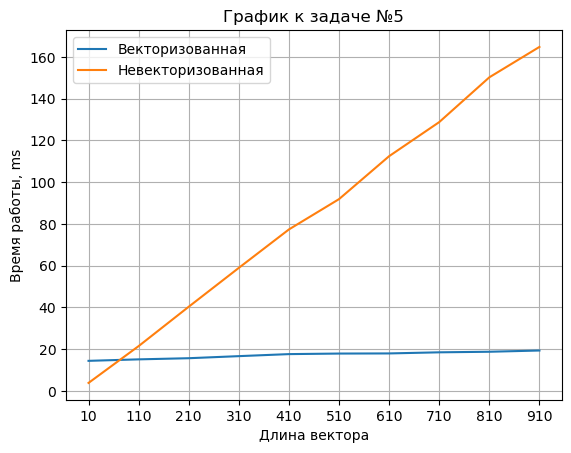

In [280]:
plt.plot(data_size_5, vect_list_5, label=u"Векторизованная")
plt.plot(data_size_5, non_vect_list_5, label=u"Невекторизованная")
plt.xticks(data_size_5)
plt.xlabel(u'Длина вектора')
plt.ylabel(u'Время работы, ms')
plt.title(u'График к задаче №5')
plt.grid(True)
plt.legend()

plt.show()

In [281]:
from scipy.spatial.distance import cdist

data_size_6 = [x for x in range(10, 150, 20)]  
vect_list_6 = list()
non_vect_list_6 = list()
cdist_list = list()

for size in data_size_6:
    X = np.random.randint(-5, 5, (size, size))
    Y = np.random.randint(-5, 5, (size, size))
    vect_time = %timeit -o pairwise_distance_vect(X, Y)
    non_vect_time = %timeit -o pairwise_distance(X, Y)
    cdist_time = %timeit -o cdist(X, Y, metric='euclidean')
    vect_list_6.append(vect_time.average * 1000)
    non_vect_list_6.append(non_vect_time.average * 1000)
    cdist_list.append(cdist_time.average * 1000)

10 µs ± 102 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
201 µs ± 2.12 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4.21 µs ± 29.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
51.9 µs ± 1.18 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.87 ms ± 32 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
16.3 µs ± 341 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
237 µs ± 19 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
5.21 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
58.6 µs ± 2.1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.02 ms ± 50.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
10.3 ms ± 488 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
139 µs ± 3.51 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.07 ms ± 85.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
16.5 ms ± 267 µs per loop (mean ± std. dev. of 7 

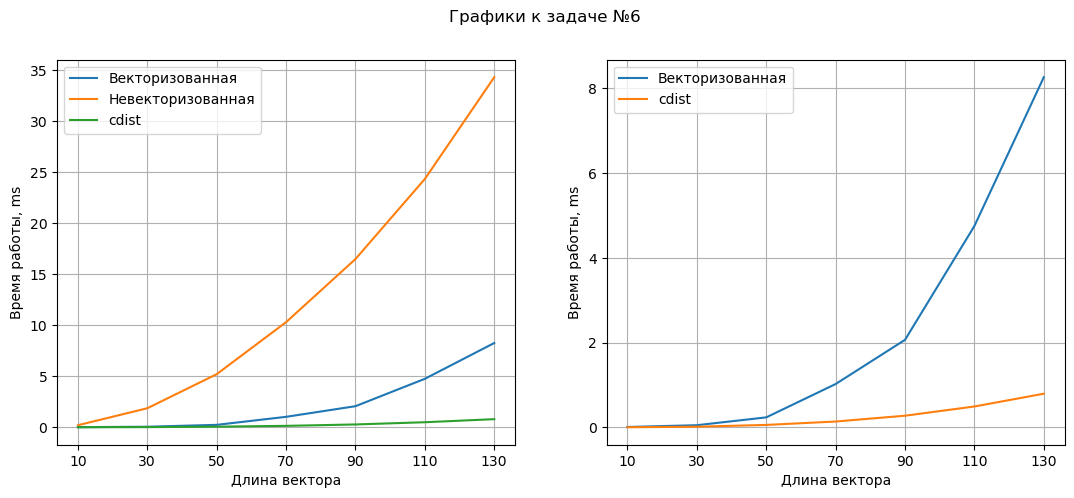

In [282]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

fig.suptitle('Графики к задаче №6')
ax1.plot(data_size_6, vect_list_6, label=u"Векторизованная")
ax1.plot(data_size_6, non_vect_list_6, label=u"Невекторизованная")
ax1.plot(data_size_6, cdist_list, label='cdist')
ax1.set_xticks(data_size_6)
ax1.set_xlabel(u'Длина вектора')
ax1.set_ylabel(u'Время работы, ms')
ax1.grid(True)
ax1.legend()

ax2.plot(data_size_6, vect_list_6, label=u"Векторизованная")
ax2.plot(data_size_6, cdist_list, label='cdist')
ax2.set_xticks(data_size_6)
ax2.set_xlabel(u'Длина вектора')
ax2.set_ylabel(u'Время работы, ms')
ax2.grid(True)
ax2.legend()


plt.show()

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

<h1>Отчет о проделанной работе</h1>

Это короткий и практически **бессмысленный** отчет.

Он нужен только для тренировки работы с *markdown*.

Ура! Я могу ~как-то~ менять текст с помощью markdown!

Это просто ___замечательно___!

In [283]:
print('https://github.com/daria-petrenko/5_sem_math_methods_of_pattern_recognition/blob/master/Daria_Petrenko_task_2.ipynb')

https://github.com/daria-petrenko/5_sem_math_methods_of_pattern_recognition/blob/master/Daria_Petrenko_task_2.ipynb


In [284]:
print('Я разбирала код для графиков по ссылке выше')

Я разбирала код для графиков по ссылке выше


In [285]:
'''
Сначала этот код генерирует массив размеров массива в заданном диапазоне. (Для удобства все матрицы генерируются квадратными)
Затем для каждого из сгенерированных размеров он создает массив(матрицу), заполненный рандомными числами в указанном промежутке. 
Потом он вычисчитывает время работы векторизованной и невекторизованой функции на сгенерированных входных данных, которое
сохраняется (с домножением на константу масштабирования) в два разных массива для векторизованной и 
невекторизованной функций соответственно и с помощью функции plt.plot() строится график зависимости времени работы от 
размера массива.
'''

'\nСначала этот код генерирует массив размеров массива в заданном диапазоне. (Для удобства все матрицы генерируются квадратными)\nЗатем для каждого из сгенерированных размеров он создает массив(матрицу), заполненный рандомными числами в указанном промежутке. \nПотом он вычисчитывает время работы векторизованной и невекторизованой функции на сгенерированных входных данных, которое\nсохраняется (с домножением на константу масштабирования) в два разных массива для векторизованной и \nневекторизованной функций соответственно и с помощью функции plt.plot() строится график зависимости времени работы от \nразмера массива.\n'